<img src="https://raw.githubusercontent.com/MLMI2-CSSI/foundry/main/assets/foundry-black.png" width=450>

# Foundry Zeolite Data Quickstart for Beginners

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MLMI2-CSSI/foundry/blob/main/examples/zeolite/zeolite_demo.ipynb)


*Original Paper:* https://doi.org/10.1126/science.abh3350

*Dataset:* https://doi.org/10.18126/c5z9-zej7

*notebook:* taken from https://github.com/MLMI2-CSSI/foundry/blob/main/examples/zeolite/zeolite_demo.ipynb


This introduction uses Foundry to:


1.   Instantiate and authenticate a Foundry client locally or in the cloud
2.   Aggregate data from the organic structure-directing database (OSDB)
3.   Perform basic data exploration

This notebook is set up to run locally or as a [Google Colaboratory](https://colab.research.google.com/notebooks/intro.ipynb#scrollTo=5fCEDCU_qrC0) notebook, which allows you to run python code in the browser, or as a [Jupyter](https://jupyter.org/) notebook, which runs locally on your machine.

The code in the next cell will detect your environment to make sure that only cells that match your environment will run.


In [2]:
try:
    import google.colab
    no_local_server = True
    no_browser = True
    globus = False
except: # when not in google colab
    no_local_server = False
    no_browser = False
    globus = True

# Environment Set Up
First we'll need to install Foundry as well as a few other packages. If you're using Google Colab, this code block will install these packages into the Colab environment.
If you are running locally, it will install these modules onto your machine if you do not already have them. We also have a [requirements file](https://github.com/MLMI2-CSSI/foundry/tree/main/examples/zeolite) included with this notebook. You can run `pip install -r requirements.txt` in your terminal to set up your environment locally.

In [3]:
#!pip install matplotlib
#!pip install foundry_ml
#!pip install seaborn

#if in Google Colab, you'll need these pinned
#versions since Colab keeps theirs a few behind
#!pip install pandas==1.2.2 tables==3.6.1

We need to import a few packages. We'll be using [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/) to make visualizations of our data, and [pandas](https://pandas.pydata.org/) to work with our data.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("poster")

# Instantiate and Authenticate Foundry
Once the installations are complete, we can import Foundry.

In [5]:
from foundry import Foundry

c:\Users\taylo\miniconda3\envs\MatInformatics\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


We'll also need to instantiate it. To do so, you'll need a [Globus](https://www.globus.org) account. Once you have your account, you can instantiate Foundry using the code below. When you instantiate Foundry locally, be sure to have your Globus endpoint turned on (you can do that with [Globus Connect Personal](https://www.globus.org/globus-connect-personal)). When you instantiate Foundry on Google Colab, you'll be given a link in the cell's output and asked to enter the provided auth code.

In [6]:
f = Foundry(no_local_server=no_local_server, no_browser=no_browser, index="mdf")

# Load the Zeolite Database
Now that we've installed and imported everything we'll need, it's time to load the data. We'll be loading 1 dataset from Foundry using `f.load` to load the data and then `f.load_data` to load the data into the client.

Heads up, this will download a file 1.6GB in size.

In [7]:
f.load("10.18126/c5z9-zej7", globus=False)
res = f.load_data()

Starting Download of: https://data.materialsdatafacility.org/foundry/foundry_osdb_v1.1/README.md
Starting Download of: https://data.materialsdatafacility.org/foundry/foundry_osdb_v1.1/data/osdb.json
Downloading... 1,641.64 MB

In [8]:
X,y = res['train']
df = pd.concat([X,y], axis=1) # sometimes easier to work with the two together

In [9]:
X.head()

,crystal_id,Zeolite,SMILES,InchiKey,Ligand formula,Loading,SCScore,Volume (Angstrom3),Axis 1 (Angstrom),Axis 2 (Angstrom),In literature?,lattice,nxyz
0,137337790,ACO,CCCCCN,DPBLXKKOBLCELK-UHFFFAOYNA-N,C5H13N,2,1.514863,107.680,7.926624,2.444878,0,"[[9.941165999999999, 0.0, 0.0], [0.0, 9.941165...","[[8.0, 2.4853014412, 2.4853014412, 2.485301441..."
1,137353625,ACO,Cc1ccncc1,FKNQCJSGGFJEIZ-UHFFFAOYNA-N,C6H7N,2,NaN,96.232,4.708724,4.317600,0,"[[9.941165999999999, 0.0, 0.0], [0.0, 9.941165...","[[8.0, 2.4853014412, 2.4853014412, 2.485301441..."
2,137369986,ACO,NCCOCCO,GIAFURWZWWWBQT-UHFFFAOYNA-N,C4H11NO2,3,1.493216,108.720,6.730158,3.173863,0,"[[9.941165999999999, 0.0, 0.0], [0.0, 9.941165...","[[8.0, 2.4853014412, 2.4853014412, 2.485301441..."
3,137352553,ACO,CCNCC,HPNMFZURTQLUMO-UHFFFAOYNA-N,C4H11N,2,1.082016,91.104,6.692582,2.429795,0,"[[9.941165999999999, 0.0, 0.0], [0.0, 9.941165...","[[8.0, 2.4853014412, 2.4853014412, 2.485301441..."
4,139638010,ACO,CCCCN,HQABUPZFAYXKJW-UHFFFAOYNA-N,C4H11N,3,1.282441,90.800,6.676878,2.528606,0,"[[9.941165999999999, 0.0, 0.0], [0.0, 9.941165...","[[8.0, 2.4853014412, 2.4853014412, 2.485301441..."


# Data Exploration

Here we explore the template "trimethyladamantylammonium", which has SMILES 'C[N+](C)(C)C12CC3CC(CC(C3)C1)C2’

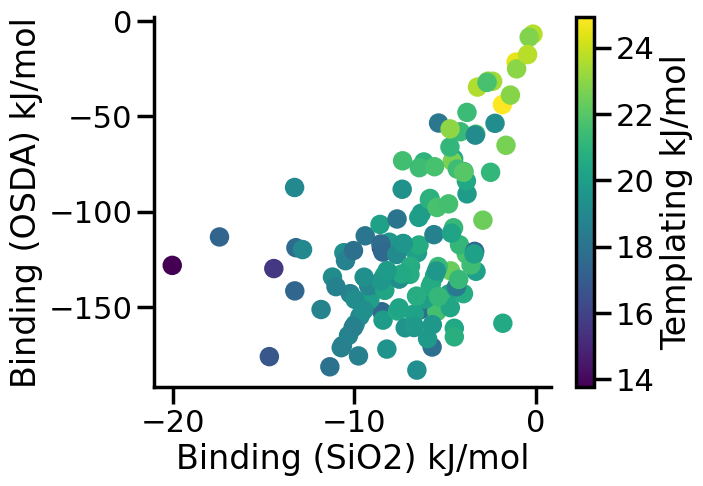

In [10]:
osdas = ['CC[N+]1(C)C(C)(C)CCCC1(C)C',
         'CC[N+]1(CC)[C@H](C)CCC[C@H]1C',
         'CN(C)[P+](C)(N(C)C)N(C)C',
         'CC[P+](CC)(CC)CC',
         'C[N+](C)(C)C12CC3CC(CC(C3)C1)C2',
         'C[N+](C)(C)C1CCCCC1',  # trimethyl
         'CC[N+](C)(C)C1CCCCC1',  # methyldimethyl
         'CC[N+](C)(CC)C1CCCCC1',  # dimethylethyl
         'CC[N+](CC)(CC)CC',
         'C1CC[N+]2(C1)CCCC2',
         'C1CC[N+]2(CC1)CCCCC2',
         'C1CCC[N+]2(CC1)CCCCC2',
         'C1CCC[N+]2(CC1)CCCCCC2',
         'CC[N+](C)(C(C)C)C(C)C']

fig, ax = plt.subplots()

d = df.loc[df.SMILES == osdas[5]]
s = ax.scatter(
    d["Binding (SiO2)"],
    d["Binding (OSDA)"],
    c=d["Templating"], #optional
)

ax.set_xlabel("Binding (SiO2) kJ/mol")
ax.set_ylabel("Binding (OSDA) kJ/mol")
sns.despine()

cb = plt.colorbar(s)
cb.set_label('Templating kJ/mol')

plt.show()

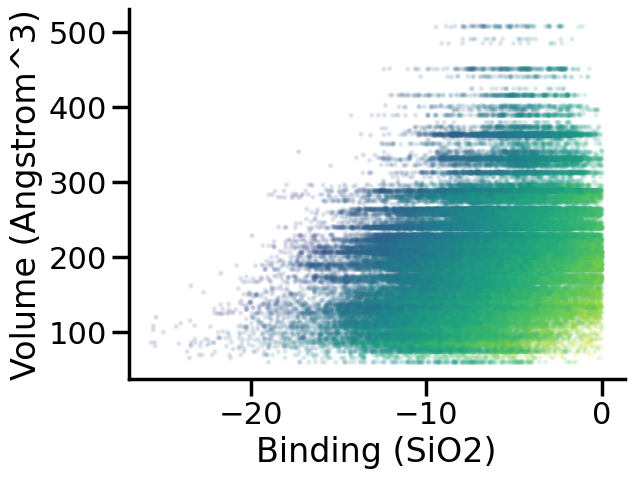

In [11]:
fig, ax = plt.subplots()

ax.scatter(
	y["Binding (SiO2)"],
	X["Volume (Angstrom3)"],
	c=y["Competition (SiO2)"],
    s=4,
    alpha=0.1
)

ax.set_xlabel("Binding (SiO2)")
ax.set_ylabel("Volume (Angstrom^3)")
sns.despine()


plt.show()